In [1]:
import json
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [2]:
with open('shipsnet.json', 'r') as file:
    dataset = json.load(file)

pd.DataFrame(dataset)

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16


In [29]:
data_ship = pd.DataFrame(dataset)[pd.DataFrame(dataset)["labels"]==1]
data_ship.labels.value_counts()

labels
1    1000
Name: count, dtype: int64

In [30]:
latitude = data_ship.locations.apply(lambda x : x[1])
longitude = data_ship.locations.apply(lambda x : x[0])

location = pd.DataFrame({"lat":latitude,"long":longitude})
location

,lat,long
0,33.738037,-118.225469
1,37.749176,-122.332229
2,33.736016,-118.142831
3,37.766487,-122.347843
4,37.758785,-122.348524
...,...,...
995,37.767167,-122.348621
996,37.739446,-122.337866
997,37.717921,-122.332850
998,37.759911,-122.356688


interactive map for the location of the ships (uncomment the cell)

In [47]:
# import plotly.express as px
# fig = px.scatter_mapbox(location, lat='lat', lon='long', zoom=5)
# fig.update_layout(mapbox_style="carto-positron")  
# fig.update_layout(title='Ships Locations')
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

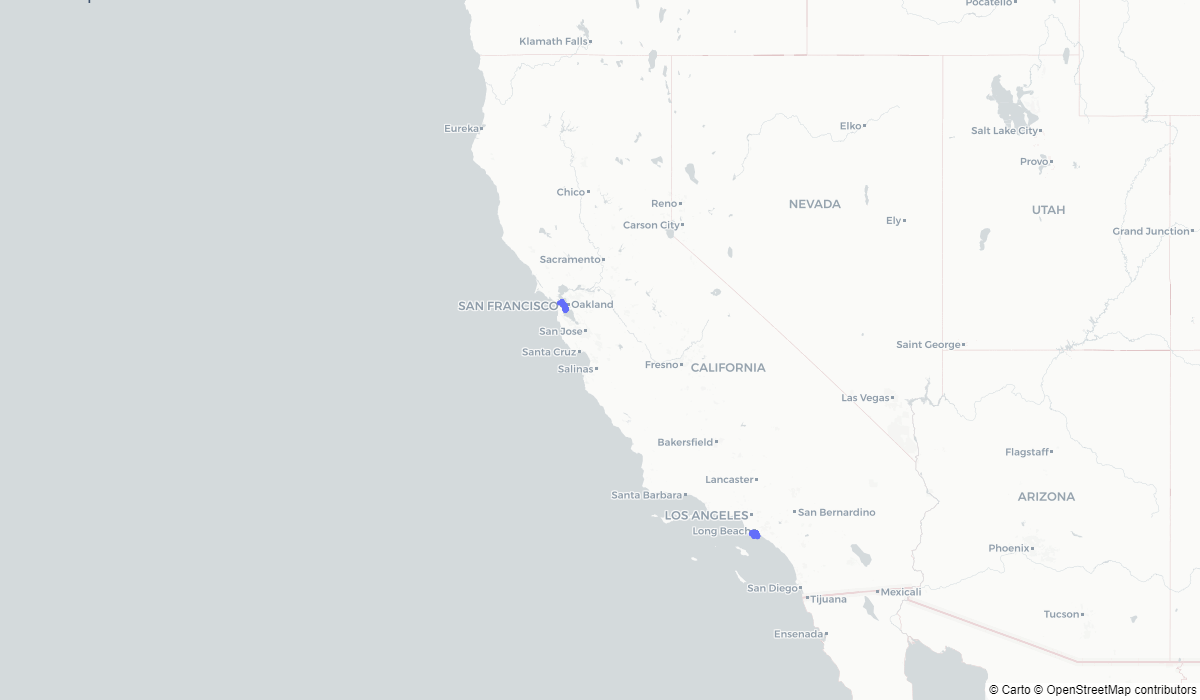

In [48]:
import plotly.express as px
from IPython.display import Image
fig = px.scatter_mapbox(location, lat='lat', lon='long', zoom=5)
fig.update_layout(mapbox_style="carto-positron")  
fig.update_layout(title='Ships Locations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

image_bytes = fig.to_image(format='png',  width=1200, height=700, scale=1) 

Image(image_bytes)

In [5]:
X = np.array(dataset["data"])/255
X = X.reshape([-1,3,80,80]).transpose([0,2,3,1])

In [6]:
Y = np.array(dataset['labels'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=2023)
print(f'x train shape : {x_train.shape} \nx test shape : {x_test.shape}')

x train shape : (3200, 80, 80, 3) 
x test shape : (800, 80, 80, 3)


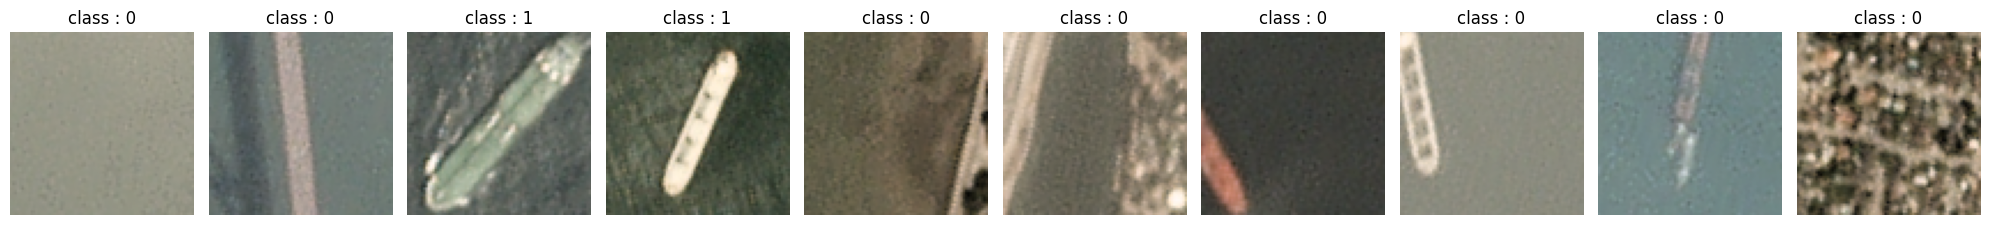

In [30]:
plt.figure(figsize=(20, 15))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'class : {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1,  activation='relu', input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)         

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train,y_train, epochs=30, validation_split = .2,batch_size=64)

Epoch 1/30
40/40 [==============================] - 3s 23ms/step - loss: 0.3972 - accuracy: 0.8281 - val_loss: 0.2540 - val_accuracy: 0.8984
Epoch 2/30
40/40 [==============================] - 1s 15ms/step - loss: 0.2023 - accuracy: 0.9141 - val_loss: 0.1703 - val_accuracy: 0.9312
Epoch 3/30
40/40 [==============================] - 1s 15ms/step - loss: 0.1700 - accuracy: 0.9316 - val_loss: 0.1553 - val_accuracy: 0.9453
Epoch 4/30
40/40 [==============================] - 1s 15ms/step - loss: 0.1245 - accuracy: 0.9492 - val_loss: 0.1295 - val_accuracy: 0.9531
Epoch 5/30
40/40 [==============================] - 1s 15ms/step - loss: 0.1090 - accuracy: 0.9582 - val_loss: 0.1126 - val_accuracy: 0.9531
Epoch 6/30
40/40 [==============================] - 1s 15ms/step - loss: 0.0840 - accuracy: 0.9684 - val_loss: 0.0967 - val_accuracy: 0.9641
Epoch 7/30
40/40 [==============================] - 1s 15ms/step - loss: 0.0665 - accuracy: 0.9770 - val_loss: 0.0965 - val_accuracy: 0.9594
Epoch 8/30
40

In [ ]:
#model.save('shipsnet.h5')

In [24]:
model = load_model('shipsnet.h5')
y_pred = [round(x[0]) for x in model.predict(x_test)]

25/25 [==============================] - 0s 5ms/step


In [25]:
pd.DataFrame({
    "y_pred": y_pred,
    "y_true": y_test
})

,y_pred,y_true
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
795,0,0
796,0,0
797,1,1
798,0,0


In [29]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.99375


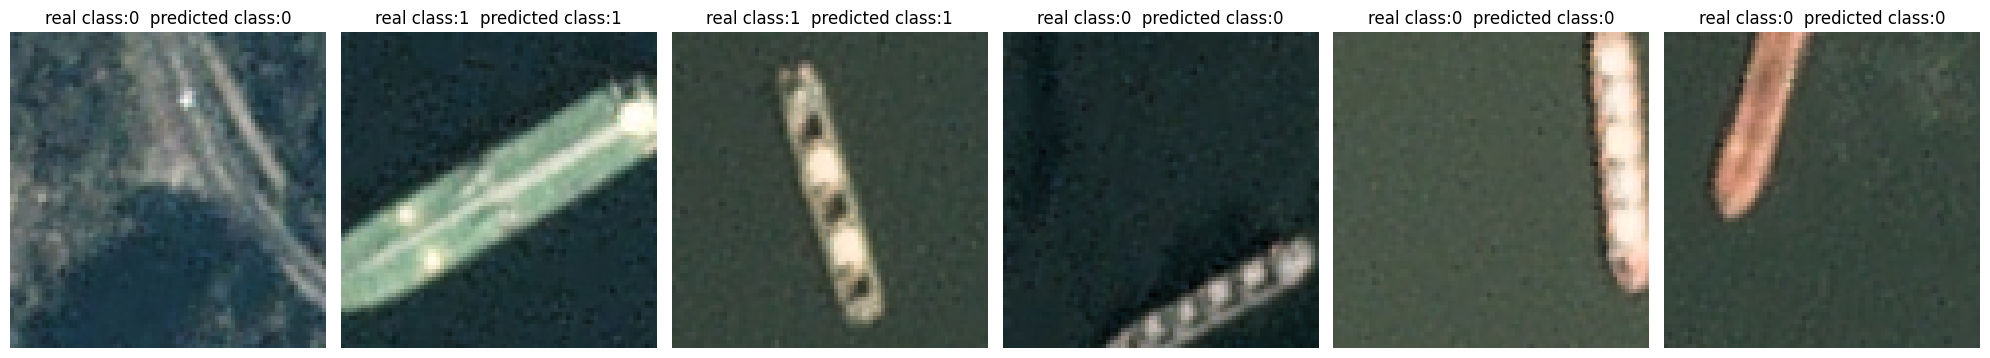

In [27]:
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'real class:{y_test[i]}  predicted class:{y_pred[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()